In [70]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

Importing basic libraries needed for reading the csv data files

In [71]:
dftest = pd.read_csv('test.csv')
dftrain = pd.read_csv('train.csv')

The current dataset for training contains 892 records

In [72]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Showing the top 10 records of the data set for analysis purpose...

In [73]:
dftrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [74]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [75]:
dftrain.drop('Cabin',axis = 1,inplace=True)
dftest.drop('Cabin',axis = 1,inplace=True)

In [76]:
dftrain['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
dftrain['Embarked'].fillna('S',inplace = True)

In [78]:
dftest['Fare'].mean()


35.627188489208635

In [79]:
dftest['Fare'].fillna(dftest['Fare'].mean(),inplace=True)

In [80]:
train_age=np.random.randint(dftrain['Age'].mean()-dftrain['Age'].std(),dftrain['Age'].mean()+dftrain['Age'].std(),177)

In [81]:
test_age = np.random.randint(dftest['Age'].mean()-dftest['Age'].std(),dftest['Age'].mean()+dftest['Age'].std(),86)

In [82]:
dftrain['Age'][dftrain['Age'].isnull()] = train_age

C:\Users\BALAJI\AppData\Local\Temp\ipykernel_17000\809980602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain['Age'][dftrain['Age'].isnull()] = train_age


In [83]:
dftest['Age'][dftest['Age'].isnull()] = test_age

C:\Users\BALAJI\AppData\Local\Temp\ipykernel_17000\4030870536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftest['Age'][dftest['Age'].isnull()] = test_age


In [84]:
dftrain.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [85]:
dftrain.groupby(['Pclass'])['Survived'].value_counts()


Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [86]:
dftrain.groupby(['Pclass'])['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [87]:
dftrain.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [88]:
dftrain.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

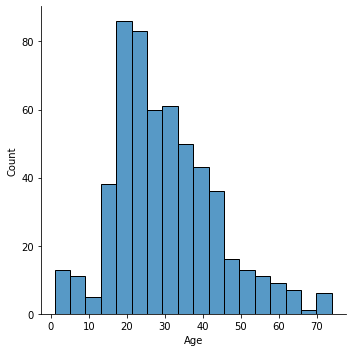

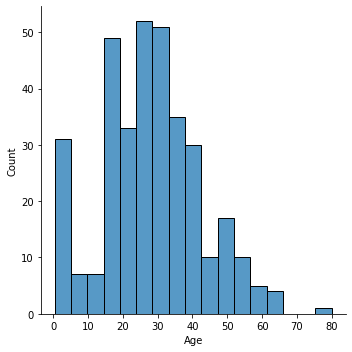

In [89]:
sns.displot(dftrain['Age'][dftrain['Survived']==0])
sns.displot(dftrain['Age'][dftrain['Survived']==1])

c:\Users\BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

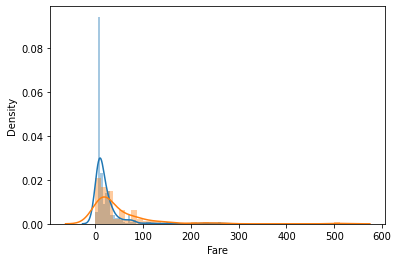

In [90]:
sns.distplot(dftrain['Fare'][dftrain['Survived']==0])
sns.distplot(dftrain['Fare'][dftrain['Survived']==1])

In [91]:
dftrain.drop(columns =['Ticket'],inplace = True )
dftest.drop(columns =['Ticket'],inplace = True )

In [92]:
dftrain['Family'] = dftrain['SibSp'] + dftrain['Parch'] + 1
dftest['Family'] = dftest['SibSp'] + dftest['Parch'] + 1

In [93]:
dftrain['Family'].value_counts()


1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [94]:
dftrain.groupby(['Family'])['Survived'].mean()


Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [95]:
def fun(num):
    if num == 1:
        x = "alone"
    elif num>1 and num<5:
        x = "medium"
    else:
        x = "large"
    return x
    

In [96]:
dftrain['family_size'] = dftrain['Family'].apply(fun)
dftest['family_size'] = dftest['Family'].apply(fun)

In [97]:
dftrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,alone


In [98]:
dftrain.drop(columns = ['SibSp','Parch','Family'],inplace=True)
dftest.drop(columns = ['SibSp','Parch','Family'],inplace=True)

In [99]:
print(dftrain.shape)
print(dftest.shape)

(891, 9)
(418, 8)


In [100]:
PassengerId = dftest['PassengerId'].values


In [101]:
dftrain.drop(columns = ['Name','PassengerId'],inplace=True)
dftest.drop(columns = ['Name','PassengerId'],inplace=True)

In [102]:
dftrain.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,medium
1,1,1,female,38.0,71.2833,C,medium
2,1,3,female,26.0,7.9250,S,alone
3,1,1,female,35.0,53.1000,S,medium
4,0,3,male,35.0,8.0500,S,alone


In [103]:
dftrain=pd.get_dummies(dftrain,columns = ['Pclass','Sex','Embarked','family_size'],drop_first = True)
dftest=pd.get_dummies(dftest,columns = ['Pclass','Sex','Embarked','family_size'],drop_first = True)

In [104]:
print(dftrain.shape)
print(dftest.shape)

(891, 10)
(418, 9)


In [105]:
X = dftrain.iloc[:,1:].values
y = dftrain.iloc[:,0].values

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [107]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [108]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [109]:
y_pred= classifier.predict(X_test)


In [110]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7374301675977654

Got 73% Accuracy from decision tree model

In [111]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [112]:
classifier.fit(X_train,y_train)


c:\Users\BALAJI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [113]:
y_pred= classifier.predict(X_test)


In [114]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.7932960893854749

79% accuracy is good for this model...